# Points Distribution from Position

Just getting a feel for the data.

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

pd.set_option('display.max_columns', None)

In [3]:
# Read all players data table
data = pd.read_csv('../../data/csv/allplayers_extra.csv')
data.head()

,id,kickoff_time,kickoff_time_formatted,team_h_score,team_a_score,was_home,round,total_points,value,transfers_balance,selected,transfers_in,transfers_out,loaned_in,loaned_out,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,ea_index,open_play_crosses,big_chances_created,clearances_blocks_interceptions,recoveries,key_passes,tackles,winning_goals,attempted_passes,completed_passes,penalties_conceded,big_chances_missed,errors_leading_to_goal,errors_leading_to_goal_attempt,tackled,offside,target_missed,fouls,dribbles,element,fixture,opponent_team,element_type,team
0,1,2018-08-12T15:00:00Z,12 Aug 16:00,0,2,True,1,3,50,0,70767,0,0,0,0,90,0,0,0,2,0,0,0,0,0,6,0,24,47.0,0.0,0.0,4.7,0,0,0,2,9,0,0,0,42,31,0,0,0,0,0,0,0,0,0,0,0,12,0,0
1,526,2018-08-18T16:30:00Z,18 Aug 17:30,3,2,False,2,3,50,188,90038,6059,5871,0,0,90,0,0,0,3,0,0,0,0,0,8,0,26,53.0,0.0,0.0,5.3,0,0,0,1,8,0,0,0,35,25,0,0,0,0,0,0,0,0,0,0,13,5,0,0
2,1053,2018-08-25T14:00:00Z,25 Aug 15:00,3,1,True,3,3,50,8540,107301,19550,11010,0,0,90,0,0,0,1,0,0,0,0,0,4,0,17,27.8,0.0,0.0,2.8,0,0,0,0,10,0,0,0,24,20,0,0,0,0,0,0,0,0,0,0,20,18,0,0
3,1584,2018-09-02T12:30:00Z,02 Sep 13:30,2,3,False,4,1,50,9582,123566,19332,9750,0,0,90,0,0,0,2,0,0,0,0,0,1,0,8,2.4,0.0,0.0,0.2,0,0,0,0,8,0,0,0,38,24,0,0,0,2,0,0,0,0,0,0,32,4,0,0
4,2121,2018-09-15T14:00:00Z,15 Sep 15:00,1,2,False,5,2,50,-3297,123310,8837,12134,0,0,90,0,0,0,1,0,0,0,0,0,1,0,13,14.2,0.0,0.0,1.4,0,0,0,2,13,0,0,0,33,23,0,0,0,0,0,0,0,0,0,0,45,14,0,0


### Look at distribution of points per position
(for players who have played 90 minutes)

In [53]:
# Include only players who have played 90 minutes
min_threshold = 90
data_90mins = data[data['minutes']>= min_threshold]
data_90mins.shape

(6314, 56)

In [59]:
# Filter by position
data_gks = data_90mins[data_90mins['element_type']==0]
data_def = data_90mins[data_90mins['element_type']==1]
data_mid = data_90mins[data_90mins['element_type']==2]
data_for = data_90mins[data_90mins['element_type']==3]

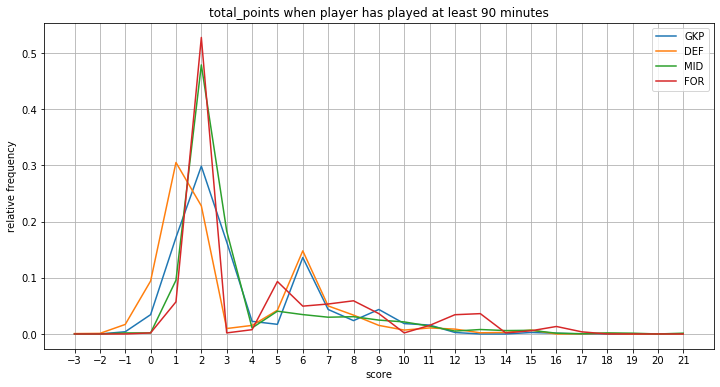

In [58]:
# column of interest
coi = 'total_points'

# Range of these values
coi_max = np.max(data_90mins[coi])
coi_min = np.min(data_90mins[coi])
coi_range = coi_max - coi_min

# bin edges and centre
b = np.linspace(coi_min-0.5, coi_max+0.5, coi_range+2)
bc = np.linspace(coi_min, coi_max, coi_range+1)

# normalise frequency to total count?
normFreq = True

# histogram data
h_gks, c_gks = np.histogram(data_gks[coi], bins=b)
h_def, c_def = np.histogram(data_def[coi], bins=b)
h_mid, c_mid = np.histogram(data_mid[coi], bins=b)
h_for, c_for = np.histogram(data_for[coi], bins=b)

# Normalise?
if normFreq:
    h_gks = h_gks/np.sum(h_gks)
    h_def = h_def/np.sum(h_def)
    h_mid = h_mid/np.sum(h_mid)
    h_for = h_for/np.sum(h_for)

# Plot
plt.figure(figsize=(12,6))

plt.plot(bc,h_gks);
plt.plot(bc,h_def);
plt.plot(bc,h_mid);
plt.plot(bc,h_for);

plt.legend(['GKP', 'DEF', 'MID', 'FOR'])
plt.grid(True)

plt.xticks(bc);
plt.title(coi + ' when player has played at least ' + str(min_threshold) + ' minutes');
plt.ylabel('relative frequency');
plt.xlabel('score');